In [16]:
%matplotlib inline
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.impute import SimpleImputer
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [27]:
df = pd.read_csv("housing.csv")
print(df.isnull().sum())

print(df.head())
print(df.info())
print(df.describe())



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


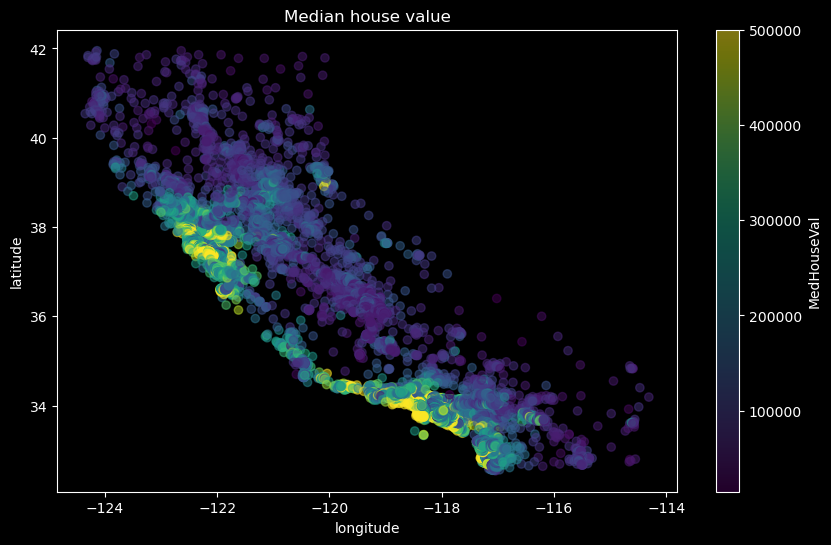

In [18]:
%matplotlib inline
plt.figure(figsize=(10, 6))  
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)  
plt.colorbar(scatter, label='MedHouseVal')  
plt.title('Median house value')  
plt.xlabel('longitude')  
plt.ylabel('latitude')  
plt.show()  

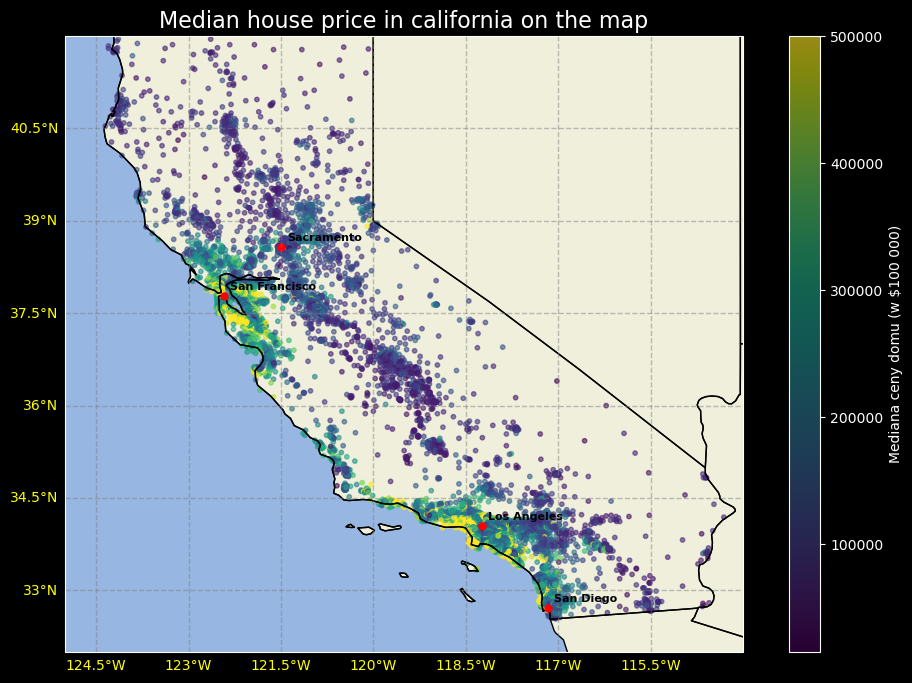

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale('50m'))       # ląd
ax.add_feature(cfeature.OCEAN.with_scale('50m'))      # ocean
ax.add_feature(cfeature.STATES.with_scale('50m'))     # granice stanów
ax.add_feature(cfeature.BORDERS.with_scale('50m'))    # granice krajów
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))  # linia brzegowa
ax.set_extent([-125, -114, 32, 42], crs=ccrs.PlateCarree())  # [min_lon, max_lon, min_lat, max_lat]
scatter = ax.scatter(
    df['longitude'],
    df['latitude'],
    c=df['median_house_value'],
    cmap='viridis',
    s=10,
    alpha=0.6,
    transform=ccrs.PlateCarree()
)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,  # pokaż etykiety
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

# Konfiguracja etykiet
gl.top_labels = False  # ukryj etykiety na górze
gl.right_labels = False  # ukryj etykiety po prawej
gl.xlabel_style = {'size': 10, 'color': 'yellow'}  # styl etykiet długości
gl.ylabel_style = {'size': 10, 'color': 'yellow'}  # styl etykiet szerokości

# Dodaj nazwy miast (czarne)
cities = {
    'Los Angeles': (-118.2437, 34.0522),
    'San Francisco': (-122.4194, 37.7749),
    'San Diego': (-117.1611, 32.7157),
    'Sacramento': (-121.4944, 38.5816)
}

for city, (lon, lat) in cities.items():
    ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())
    ax.text(
        lon + 0.1,
        lat + 0.1,
        city,
        fontsize=8,
        color='black',
        weight='bold',
        transform=ccrs.PlateCarree()
    )

# Dodaj tytuł i colorbar
plt.colorbar(scatter, label='Mediana ceny domu (w $100 000)', ax=ax)
ax.set_title('Median house price in california on the map', fontsize=16)
plt.show()

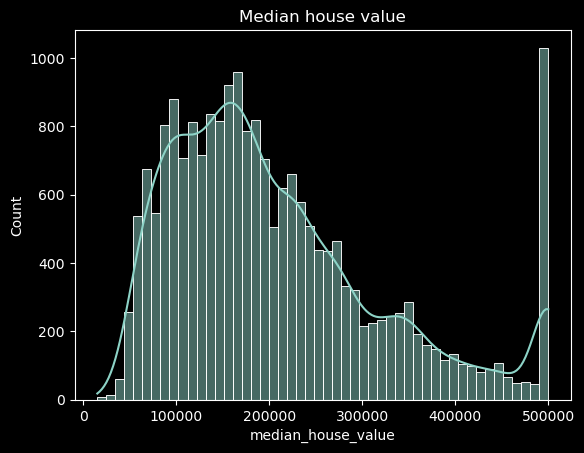

In [20]:
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Median house value')
plt.show()

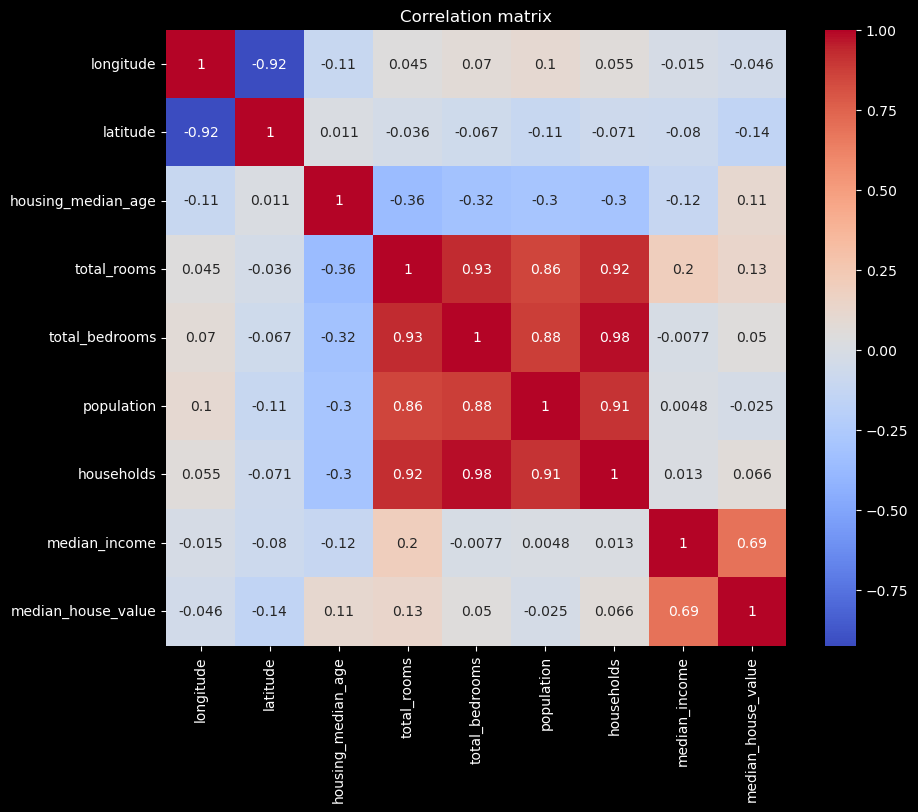

In [21]:
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()